In [31]:
import numpy as np
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [32]:
df=pd.read_csv("D:\Анализ данных\data_analysis\Homeworks\Homework3\ORGANICS.csv",encoding="cp1251")

In [33]:
df.info()
df = df.fillna(df.median(axis=0), axis=0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 13 columns):
ID                 22223 non-null int64
DemAffl            21138 non-null float64
DemAge             20715 non-null float64
DemCluster         21549 non-null float64
DemClusterGroup    21549 non-null object
DemGender          19711 non-null object
DemReg             21758 non-null object
DemTVReg           21758 non-null object
PromClass          22223 non-null object
PromSpend          22223 non-null float64
PromTime           21942 non-null float64
TargetBuy          22223 non-null int64
TargetAmt          22223 non-null int64
dtypes: float64(5), int64(3), object(5)
memory usage: 2.2+ MB


In [34]:
x = df[['PromTime', "PromSpend", "DemAge", "DemAffl", "DemCluster"]]
y = df.values[::,11]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

y_test = y_test.astype(int)
y_train = y_train.astype(int)

tree = DecisionTreeClassifier(max_depth=5, criterion = "entropy", random_state=0)
tree.fit(X_train, y_train)

CM = metrics.confusion_matrix(y_test, lr.predict(X_test))
#получаем значения
print(CM[0][0])
print(CM[1][0])
print(CM[1][1])
print(CM[0][1]) 

preds = tree.predict(X_test) 

print(metrics.accuracy_score(y_test, preds))
print(metrics.recall_score(y_test, preds))
print(metrics.precision_score(y_test, preds))
print(metrics.f1_score(y_test, preds))
print(metrics.balanced_accuracy_score(y_test, preds))
print(metrics.matthews_corrcoef(y_test, preds))
print(metrics.cohen_kappa_score(y_test, preds))

4794
1077
559
237
0.8054597270136493
0.3905867970660147
0.6805111821086262
0.49631067961165043
0.6654782524387914
0.40940715564351315
0.3865181112012054


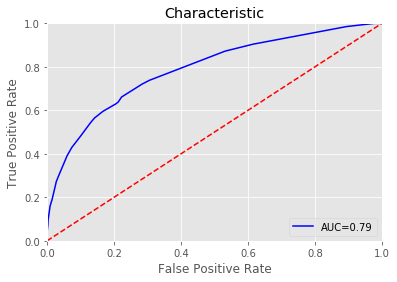

In [35]:
pred_prob = tree.predict_proba(X_test)
preds = pred_prob[:, -1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC=%0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()